link:  https://dados.gov.br/dataset/corridas-do-taxigov#

Nono digito significado: https://www.gov.br/receitafederal/pt-br/assuntos/educacao-fiscal/educacao_fiscal/folhetos-orientativos/cadastros-dig.pdf

__Bibliotecas necessárias__

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

__Carrega os dados__

In [2]:
df = pd.read_csv("http://repositorio.dados.gov.br/seges/taxigov/taxigov-passageiros-solicitantes-mes.zip",
                 compression='zip')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54230 entries, 0 to 54229
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   nome_passageiro      54230 non-null  object 
 1   nome_solicitante     54230 non-null  object 
 2   cpf_solicitante      54230 non-null  object 
 3   ano_mes              54230 non-null  int64  
 4   km_total             54228 non-null  float64
 5   valor_corridas       54230 non-null  float64
 6   quantidade_corridas  54230 non-null  int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 2.9+ MB


In [4]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ano_mes,54230.0,202011.477245,75.489310,201909.0,201912.00,202004.00,202103.00,202112.00
km_total,54228.0,40.948246,84.468064,0.0,6.60,16.00,39.70,2234.20
valor_corridas,54230.0,123.313496,249.327050,0.0,20.88,49.01,120.06,6532.37
quantidade_corridas,54230.0,4.970791,6.971072,1.0,2.00,3.00,6.00,199.00


__Checa se há algum valor nulo no dataframe__

In [5]:
df.isna().sum()

nome_passageiro        0
nome_solicitante       0
cpf_solicitante        0
ano_mes                0
km_total               2
valor_corridas         0
quantidade_corridas    0
dtype: int64

In [6]:
df[df['km_total'].isna()]

,nome_passageiro,nome_solicitante,cpf_solicitante,ano_mes,km_total,valor_corridas,quantidade_corridas
8413,CARLOS HUGO SUAREZ SAMPAIO,CARLOS HUGO SUAREZ SAMPAIO,***.826.709-**,201912,NaN,7.54,1
50409,THAISE MORAES TORRES,THAISE MORAES TORRES,***.462.271-**,201912,NaN,5.80,1


Cria clounas **mes** e **ano** a partir da coluna **mes_ano**

In [7]:
df['ano'] = df['ano_mes'].apply(lambda x: int(str(x)[:-2]))
df['mes'] = df['ano_mes'].apply(lambda x: int(str(x)[-2:]))

In [8]:
df.drop('ano_mes',axis=1,inplace=True)

__Checa os registros no quais o nome do solicitante é diferente do nome do passageiro__


In [9]:
df[df['nome_solicitante']!=df['nome_passageiro']]

,nome_passageiro,nome_solicitante,cpf_solicitante,km_total,valor_corridas,quantidade_corridas,ano,mes
0,DOUGLAS BORGES DE SOUSA,DOUGLAS BORGES DE SOUSA,***.425.428-**,20.20,59.99,1,2020,10
5,Elizete Meireles da Costa,ELIZETE MEIRELES DA COSTA,***.378.031-**,13.50,39.15,1,2020,4
6,Elizete Meireles da Costa,ELIZETE MEIRELES DA COSTA,***.378.031-**,1.40,5.94,1,2020,5
7,Elizete Meireles da Costa,ELIZETE MEIRELES DA COSTA,***.378.031-**,3.50,10.40,1,2020,9
8,Elizete Meireles da Costa,ELIZETE MEIRELES DA COSTA,***.378.031-**,6.40,29.70,5,2020,12
...,...,...,...,...,...,...,...,...
53825,WILLIAN ALMEIDA CAVALCANTI,DHENNER MITCHEL LOPES DE SOUZA,***.989.206-**,23.20,68.91,2,2020,7
53999,WILSON PEREIRA RODRIGUES FILHO,FRANCISCO FELIPE SANTIAGO,***.800.081-**,28.10,83.46,1,2020,7
54132,Yasmin Marques Barros,YASMIN MARQUES BARROS,***.785.181-**,40.30,119.69,4,2021,3
54135,Yasmin Marques Barros,YASMIN MARQUES BARROS,***.785.181-**,40.48,127.92,4,2021,7


__Converte nomes em letras maísculas e limpa caracteres de espaço__

In [10]:
df['nome_solicitante'] = df['nome_solicitante'].apply(lambda x: x.upper().strip())

In [11]:
df['nome_passageiro'] = df['nome_passageiro'].apply(lambda x: x.upper().strip())

In [12]:
df[df['nome_solicitante']!=df['nome_passageiro']]

,nome_passageiro,nome_solicitante,cpf_solicitante,km_total,valor_corridas,quantidade_corridas,ano,mes
20,01,ADRIANA OLIVEIRA E SILVA,***.997.951-**,1.01,6.32,1,2021,8
21,01,ADRIANA OLIVEIRA E SILVA,***.997.951-**,1.03,6.32,1,2021,9
22,01,RAIMUNDO SOARES BRITO,***.411.501-**,1.80,5.94,1,2020,7
23,04,GUY MADESON NATION DE JESUS SANTOS,***.132.551-**,6.80,20.20,1,2020,12
25,1,GISELA GOMES SANCHES,***.565.001-**,11.50,34.16,1,2021,1
...,...,...,...,...,...,...,...,...
53195,WANESSA PORTO SILVA,ANDRÉ LUIZ TOSCANO DE BRITO,***.284.026-**,2.08,6.58,1,2021,10
53326,WELDER ALMEIDA DE OLIVEIRA,LUCELIA DOS SANTOS ALMEIDA MACHADO,***.011.951-**,2.20,6.38,1,2020,3
53810,WILLIAM SOUTO SILVA,IGOR DE FREITAS VASCONCELOS,***.171.471-**,25.30,75.14,2,2021,3
53825,WILLIAN ALMEIDA CAVALCANTI,DHENNER MITCHEL LOPES DE SOUZA,***.989.206-**,23.20,68.91,2,2020,7



__CPFs ausentes__

In [13]:
df[df['cpf_solicitante'].apply(lambda x: len(x)<11)]

,nome_passageiro,nome_solicitante,cpf_solicitante,km_total,valor_corridas,quantidade_corridas,ano,mes
28,12241,12241,-,44.84,141.69,2,2021,7
29,15101,15101,-,17.49,53.05,3,2021,5
30,15101,15101,-,26.15,82.64,5,2021,6
31,15101,15101,-,7.16,22.64,1,2021,7
32,15101,15101,-,57.11,180.48,10,2021,8
...,...,...,...,...,...,...,...,...
54152,YSABELLE CASTRO,YSABELLE CASTRO,-,9.30,29.11,4,2020,6
54153,YSABELLE CASTRO,YSABELLE CASTRO,-,19.80,60.30,7,2020,7
54154,YSABELLE CASTRO,YSABELLE CASTRO,-,9.50,28.22,2,2020,8
54155,YSABELLE CASTRO,YSABELLE CASTRO,-,10.40,31.79,4,2020,9


__Número de solicitantes distintos na base de dados__

In [14]:
df[df['cpf_solicitante'].apply(lambda x: len(x)>11)]['cpf_solicitante'].nunique()

11684

__Valor total gasto em corridas (em Milhões de reais) em todo o período registrado__

In [15]:
df['valor_corridas'].sum()/1e6

6.687290894999999

__Quantidade total das corridas em todo o período registrado__

In [16]:
df['quantidade_corridas'].sum()

269566

__Quantidade total de km (em milhões) em todo o período registrado__

In [17]:
df['km_total'].sum()/1e6

2.220541462

__Passageiro com maior valor de corridas registrada num dado mês__

In [18]:
df[(df['valor_corridas']==df['valor_corridas'].max())]

,nome_passageiro,nome_solicitante,cpf_solicitante,km_total,valor_corridas,quantidade_corridas,ano,mes
5399,ANTONIO CARLOS VIEIRA DOS SANTOS,ANTONIO CARLOS VIEIRA DOS SANTOS,***.916.547-**,2234.2,6532.37,58,2021,8


__Passageiro com maior quantidade de solicitações de corrida registrada num dado mês__

In [19]:
df[df['quantidade_corridas']==df['quantidade_corridas'].max()]

,nome_passageiro,nome_solicitante,cpf_solicitante,km_total,valor_corridas,quantidade_corridas,ano,mes
19664,FRANCIVAN DO NASCIMENTO ASSIS,FRANCIVAN DO NASCIMENTO ASSIS,***.313.061-**,1413.71,4583.75,199,2021,8


Todas as corridas solicitadas por esse passageiro ao longo dos meses

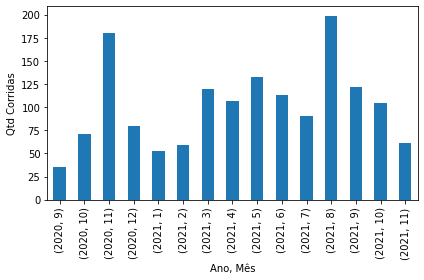

In [20]:
df[df['cpf_solicitante']=='***.313.061-**'].groupby(['ano','mes']).sum()['quantidade_corridas'].plot(kind='bar')
plt.ylabel('Qtd Corridas')
plt.xlabel('Ano, Mês')
plt.tight_layout()

__As 10 maiores quantidades de corridas solicitadas__

In [21]:
df['quantidade_corridas'].nlargest(10).values

array([199, 180, 133, 122, 120, 113, 107, 106, 104, 100])

In [22]:
frames=[]
for each in df['quantidade_corridas'].nlargest(10):
    frames.append(df[df['quantidade_corridas']==each])
    qt_corridas_10 = pd.concat(frames)
qt_corridas_10

,nome_passageiro,nome_solicitante,cpf_solicitante,km_total,valor_corridas,quantidade_corridas,ano,mes
19664,FRANCIVAN DO NASCIMENTO ASSIS,FRANCIVAN DO NASCIMENTO ASSIS,***.313.061-**,1413.71,4583.75,199,2021,8
19655,FRANCIVAN DO NASCIMENTO ASSIS,FRANCIVAN DO NASCIMENTO ASSIS,***.313.061-**,1559.10,4332.95,180,2020,11
19661,FRANCIVAN DO NASCIMENTO ASSIS,FRANCIVAN DO NASCIMENTO ASSIS,***.313.061-**,521.23,1698.98,133,2021,5
19665,FRANCIVAN DO NASCIMENTO ASSIS,FRANCIVAN DO NASCIMENTO ASSIS,***.313.061-**,718.42,2433.80,122,2021,9
19659,FRANCIVAN DO NASCIMENTO ASSIS,FRANCIVAN DO NASCIMENTO ASSIS,***.313.061-**,462.06,1748.61,120,2021,3
19662,FRANCIVAN DO NASCIMENTO ASSIS,FRANCIVAN DO NASCIMENTO ASSIS,***.313.061-**,969.06,3123.95,113,2021,6
19660,FRANCIVAN DO NASCIMENTO ASSIS,FRANCIVAN DO NASCIMENTO ASSIS,***.313.061-**,357.65,1226.27,107,2021,4
8156,CARLOS BATISTA DA SILVA,CARLOS BATISTA DA SILVA,***.104.941-**,677.80,2013.76,106,2020,12
19666,FRANCIVAN DO NASCIMENTO ASSIS,FRANCIVAN DO NASCIMENTO ASSIS,***.313.061-**,462.68,1534.28,104,2021,10
18445,FERNANDO GOMES PINTO DOS REIS MACHADO,FERNANDO GOMES PINTO DOS REIS MACHADO,***.846.701-**,531.00,1570.93,100,2019,10


__Os 10 maiores valores de corridas solicitadas__

In [23]:
df['valor_corridas'].nlargest(10).values

array([6532.37, 6189.3 , 6064.24, 5838.99, 4693.77, 4681.64, 4583.75,
       4577.95, 4516.17, 4478.78])

In [24]:
frames=[]
for each in df['valor_corridas'].nlargest(10):
    frames.append(df[df['valor_corridas']==each])
    qt_corridas_10 = pd.concat(frames)
qt_corridas_10

,nome_passageiro,nome_solicitante,cpf_solicitante,km_total,valor_corridas,quantidade_corridas,ano,mes
5399,ANTONIO CARLOS VIEIRA DOS SANTOS,ANTONIO CARLOS VIEIRA DOS SANTOS,***.916.547-**,2234.200,6532.37,58,2021,8
40630,NOEL CARLOS SERAPHIM RAMOS DA SILVA,NOEL CARLOS SERAPHIM RAMOS DA SILVA,***.423.007-**,2094.323,6189.30,60,2021,9
28207,JOSINALDO DA SILVA,JOSINALDO DA SILVA,***.424.877-**,2016.755,6064.24,78,2020,4
5398,ANTONIO CARLOS VIEIRA DOS SANTOS,ANTONIO CARLOS VIEIRA DOS SANTOS,***.916.547-**,1986.711,5838.99,57,2021,7
5388,ANTONIO CARLOS VIEIRA DOS SANTOS,ANTONIO CARLOS VIEIRA DOS SANTOS,***.916.547-**,1589.124,4693.77,44,2020,9
26069,JOAO MARCUS OKUMURA,JOAO MARCUS OKUMURA,***.507.801-**,1572.400,4681.64,55,2020,5
19664,FRANCIVAN DO NASCIMENTO ASSIS,FRANCIVAN DO NASCIMENTO ASSIS,***.313.061-**,1413.710,4583.75,199,2021,8
5397,ANTONIO CARLOS VIEIRA DOS SANTOS,ANTONIO CARLOS VIEIRA DOS SANTOS,***.916.547-**,1556.040,4577.95,43,2021,6
26065,JOAO MARCUS OKUMURA,JOAO MARCUS OKUMURA,***.507.801-**,1556.000,4516.17,58,2020,1
5396,ANTONIO CARLOS VIEIRA DOS SANTOS,ANTONIO CARLOS VIEIRA DOS SANTOS,***.916.547-**,1529.360,4478.78,43,2021,5


__Os maiores valores de corridas por ano e seus respectivos solicitantes__
____

In [25]:
df.groupby('ano')['valor_corridas'].max()

ano
2019    3889.78
2020    6064.24
2021    6532.37
Name: valor_corridas, dtype: float64

In [26]:
frames=[]
for each in df.groupby('ano')['valor_corridas'].max():
    frames.append(df[df['valor_corridas']==each])
    mv = pd.concat(frames)
mv

,nome_passageiro,nome_solicitante,cpf_solicitante,km_total,valor_corridas,quantidade_corridas,ano,mes
26063,JOAO MARCUS OKUMURA,JOAO MARCUS OKUMURA,***.507.801-**,1339.600,3889.78,42,2019,11
28207,JOSINALDO DA SILVA,JOSINALDO DA SILVA,***.424.877-**,2016.755,6064.24,78,2020,4
5399,ANTONIO CARLOS VIEIRA DOS SANTOS,ANTONIO CARLOS VIEIRA DOS SANTOS,***.916.547-**,2234.200,6532.37,58,2021,8


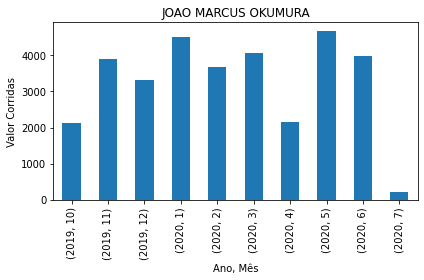

In [27]:
df[df['cpf_solicitante']=='***.507.801-**'].groupby(['ano','mes']).sum()['valor_corridas'].plot(kind='bar')
plt.ylabel('Valor Corridas')
plt.xlabel('Ano, Mês')
plt.title('JOAO MARCUS OKUMURA')
plt.tight_layout()

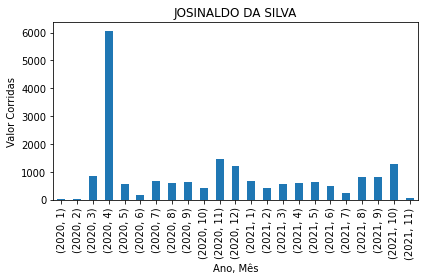

In [28]:
df[df['cpf_solicitante']=='***.424.877-**'].groupby(['ano','mes']).sum()['valor_corridas'].plot(kind='bar')
plt.ylabel('Valor Corridas')
plt.xlabel('Ano, Mês')
plt.title('JOSINALDO DA SILVA')
plt.tight_layout()

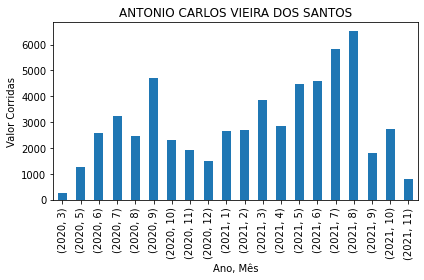

In [29]:
df[df['cpf_solicitante']=='***.916.547-**'].groupby(['ano','mes']).sum()['valor_corridas'].plot(kind='bar')
plt.ylabel('Valor Corridas')
plt.xlabel('Ano, Mês')
plt.title('ANTONIO CARLOS VIEIRA DOS SANTOS')
plt.tight_layout()


___
__Total de km, valor e quantidade de corridas por ano e mes__

In [30]:
df_ano_mes = df.groupby(['ano','mes']).sum()
df_ano_mes 

km_total  valor_corridas  quantidade_corridas
ano  mes                                                 
2019 9     12350.620       36496.760                 1940
     10   156470.830      464202.220                26505
     11   146553.548      429727.610                23808
     12   119127.100      353833.830                19155
2020 1    112984.852      335348.560                18100
     2    120354.078      357846.670                19990
     3    111480.784      330099.705                16234
     4     36488.238      107109.110                 3282
     5     42188.640      123996.110                 4166
     6     49778.626      149109.160                 4983
     7     51393.448      154792.420                 5330
     8     64214.279      192826.440                 5940
     9     67296.521      201458.150                 6441
     10    69763.668      208980.280                 6758
     11    81390.017      225977.210                 7724
     12    80117.604      239178.450                 8015
2021 1     60753.725      180178.630                 6828
     2     70470.162      210910.790                 7270
     3     75133.367      237963.520                 7446
     4     75522.684      222858.270                 6706
     5     77122.576      232079.910                 7500
     6     78765.807      247132.860                 7827
     7     75671.234      237060.060                 7799
     8     99054.011      310691.750                 9768
     9     99137.002      310530.780                 9456
     10    94204.143      294687.350                 9353
     11    80804.481      254053.530                 9581
     12    11949.417       38160.760                 1661

<Figure size 720x288 with 0 Axes>

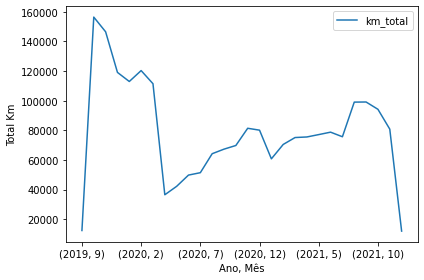

In [31]:
plt.figure(figsize=(10,4))
df.groupby(['ano','mes']).sum()[['km_total']].plot()
plt.ylabel('Total Km')
plt.xlabel('Ano, Mês')
plt.tight_layout()

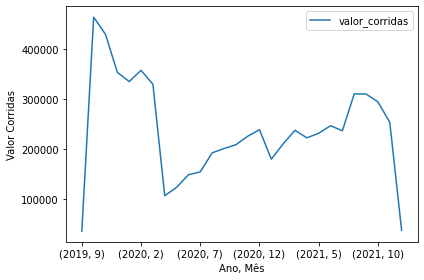

In [32]:
df.groupby(['ano','mes']).sum()[['valor_corridas']].plot()
plt.ylabel('Valor Corridas')
plt.xlabel('Ano, Mês')
plt.tight_layout()

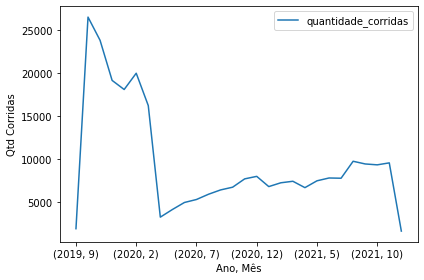

In [33]:
df.groupby(['ano','mes']).sum()[['quantidade_corridas']].plot()
plt.ylabel('Qtd Corridas')
plt.xlabel('Ano, Mês')
plt.tight_layout()

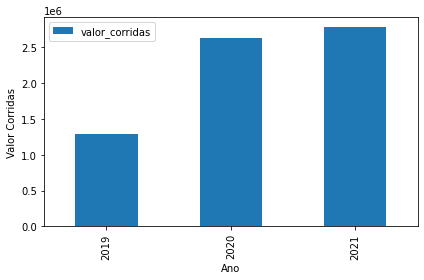

In [34]:
df.groupby(['ano']).sum()[['valor_corridas']].plot(kind='bar')
plt.ylabel('Valor Corridas')
plt.xlabel('Ano')
plt.tight_layout()

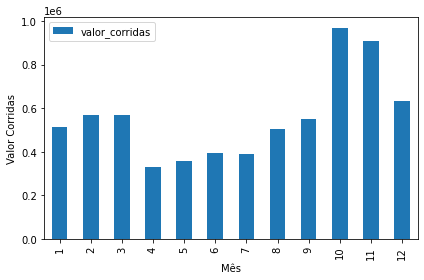

In [35]:
df.groupby(['mes']).sum()[['valor_corridas']].plot(kind='bar')
plt.ylabel('Valor Corridas')
plt.xlabel('Mês')
plt.tight_layout()

<Figure size 720x288 with 0 Axes>

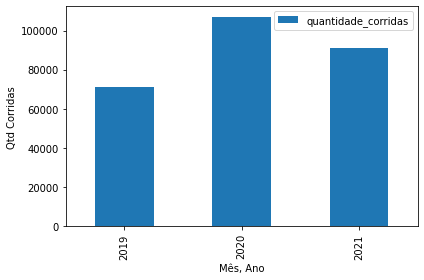

In [36]:
plt.figure(figsize=(10,4))
df.groupby(['ano']).sum()[['quantidade_corridas']].plot(kind='bar')
plt.ylabel('Qtd Corridas')
plt.xlabel('Mês, Ano')
plt.tight_layout()

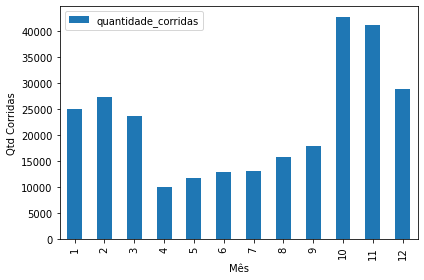

In [37]:
df.groupby(['mes']).sum()[['quantidade_corridas']].plot(kind='bar')
plt.ylabel('Qtd Corridas')
plt.xlabel('Mês')
plt.tight_layout()

In [38]:
df_ano_mes.reset_index(inplace=True)

<AxesSubplot:xlabel='mes', ylabel='valor_corridas'>

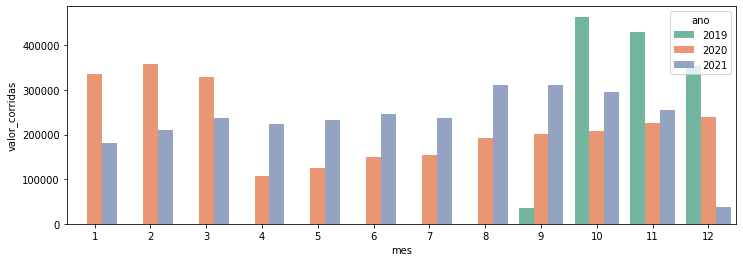

In [39]:
plt.figure(figsize=(12,4))
sns.barplot(x='mes',y='valor_corridas',data=df_ano_mes,hue='ano',palette='Set2')

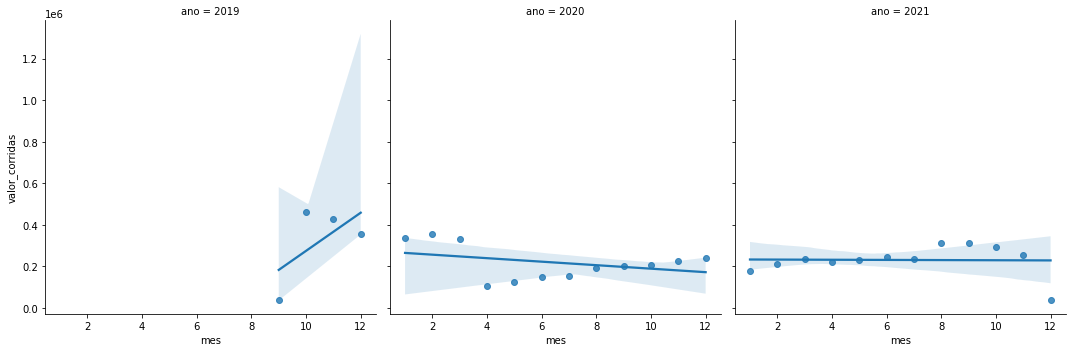

In [40]:
sns.lmplot(x='mes',y='valor_corridas',data=df_ano_mes,col='ano')

In [41]:
gasto_corridas = df.groupby(['ano','mes']).sum()['valor_corridas'].unstack()

<AxesSubplot:xlabel='mes', ylabel='ano'>

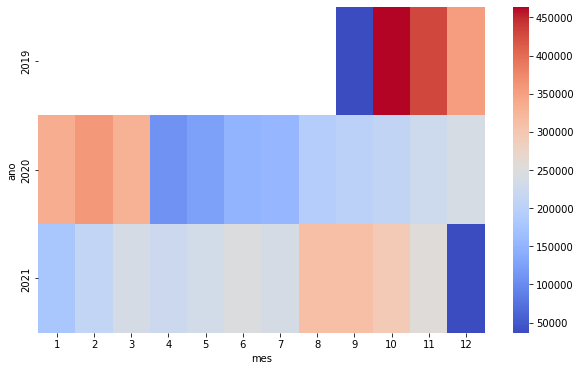

In [42]:
plt.figure(figsize=(10,6))
sns.heatmap(gasto_corridas,cmap='coolwarm')